In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


## QSN 1
Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [3]:
df = df[(df['value'] >= (df['value'].quantile(0.02))) & (df['value'] <= (df['value'].quantile(0.975)))]

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

## QSN 2
Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

In [5]:
df.index

Index([  10,   11,   17,   18,   19,   20,   22,   28,   29,   30,
       ...
       1286, 1287, 1290, 1291, 1293, 1294, 1299, 1300, 1301, 1303],
      dtype='int64', length=1244)

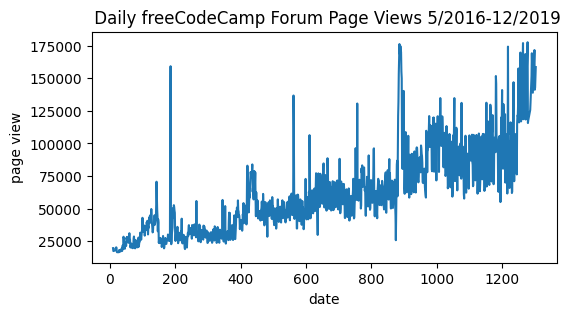

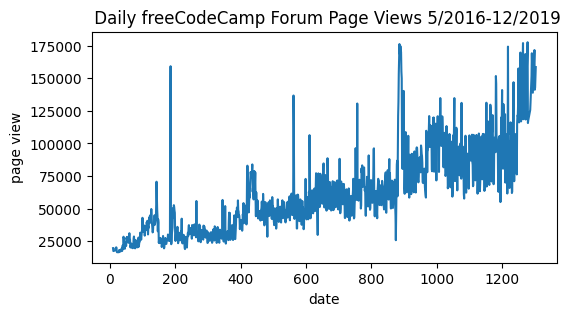

In [6]:
import matplotlib.pyplot as plt
def draw_line_plot():
    fig = plt.figure(figsize=(6,3))
    plt.plot(df.index, df['value'])
    plt.title(' Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('date')
    plt.ylabel('page view')
    fig.savefig('line_plot.png')
    return fig
draw_line_plot()

## QSN 3
Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [7]:
df.head()

,date,value,year,month
10,2016-05-19,19736,2016,5
11,2016-05-20,17491,2016,5
17,2016-05-26,18060,2016,5
18,2016-05-27,19997,2016,5
19,2016-05-28,19044,2016,5


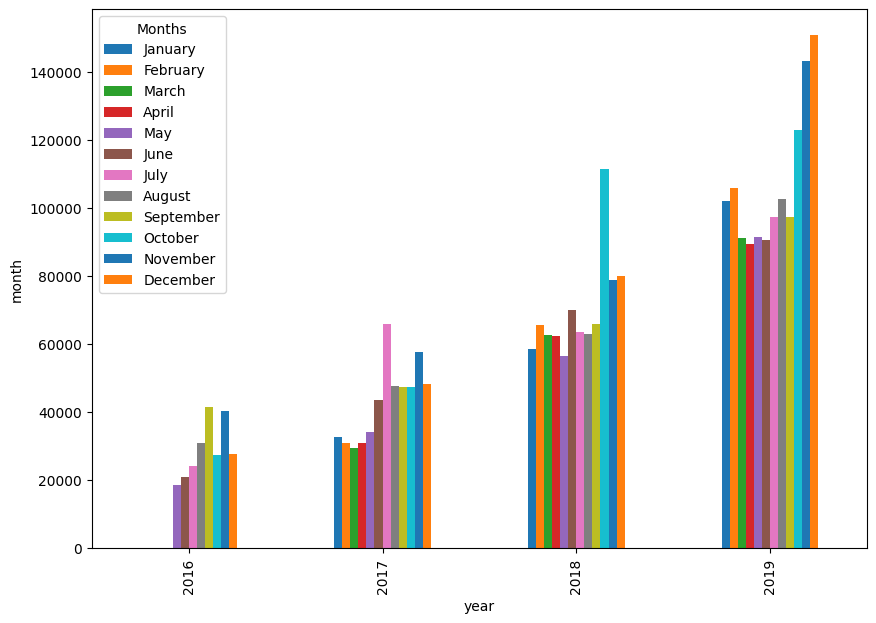

In [8]:
def draw_bar_plot():
    n = df.groupby('year')['month'].mean()
    n = n.reset_index()
    df_pivtab = df.pivot_table(
        values = 'value',
        index = 'year',
        columns = 'month')
    ax = df_pivtab.plot(kind='bar')
    fig = ax.get_figure()
    fig.set_size_inches(10,7)
    ax.set_xlabel('year')
    ax.set_ylabel('month')
    plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title = 'Months')
    
draw_bar_plot()

## QSN 4
Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [9]:
import seaborn as sns

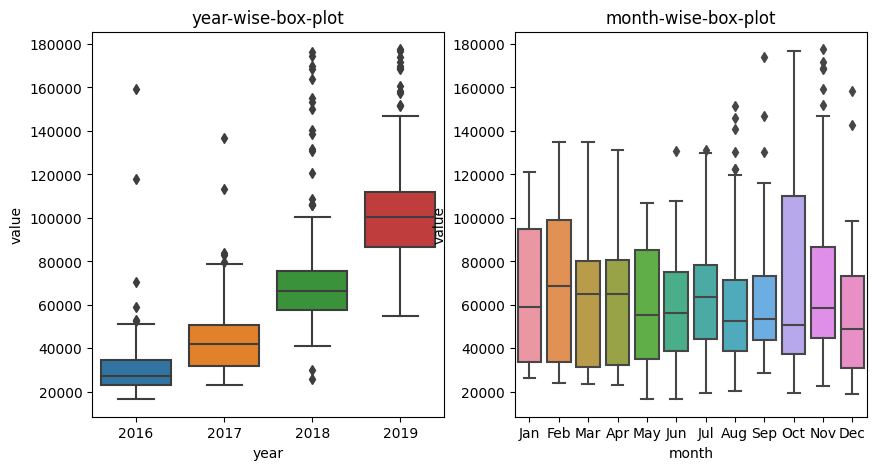

In [30]:
def draw_box_plot():
    df['year'] = [d.year for d in df.date]
    df['month'] = [d.strftime('%b') for d in df.date]
    
    df['year'] = [d.year for d in df.date]
    df['month'] = [d.strftime('%b') for d in df.date]
    
    fig, ax = plt.subplots(1,2, figsize=(10,5))
#     fig.set_size_inches(4,2)
    sns.boxplot(x= df['year'], y=df['value'], ax=ax[0])
    sns.boxplot(x= df['month'], y=df['value'],order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'], ax=ax[1]) 
    ax[0].set_title('year-wise-box-plot')
    ax[1].set_title('month-wise-box-plot')
draw_box_plot()